# LABORATORIO 1


## Entendimiento de los Datos

1.1 Carga de librerias

In [ ]:
import numpy as np
import pandas as pd

#from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

1.2 Carga de los Datos

In [18]:
#Carga de datos
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

df = pd.read_csv('./training_data.csv')
data= df.copy()
print(df.columns)


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'score', 'clean', 'class', 'redshift', 'mjd', 'rowv', 'colv'],
      dtype='object')


1.3 Información Basica de los Datos

In [ ]:
df_dim = df.shape
print(">> El dataframe contiene " + str(df_dim[1]) + " columnas y "+ str(df_dim[0]) +" filas.\n")
print(">> La estructura de los datos es la siguiente: ")
df.head()

#Muestra de primeros datos
data.head() 

>> El dataframe contiene 18 columnas y 4000 filas

>> El dataframe se ve de la siguiente forma: 


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


In [7]:
#Dimension de los datos
data.shape


(4000, 18)

1.4 Perfilamiento de datos

In [5]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


In [6]:
#Entendimiento del tipo de los datos
data.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

1.5 Calidad de los Datos

In [7]:
#Completitud 
data.isnull().sum()    

objid       0
ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
mjd         0
rowv        0
colv        0
dtype: int64

In [8]:
#Filas duplicadas
data.duplicated().sum()

np.int64(17)

In [9]:
#Verifación de Valores Fuera de Rango

#Redshift es una distancia, no puede ser negativa
print("Redshift negativos:", (data["redshift"] < 0).sum())
#El score debe estar entre 0 y 1
print("Score fuera de rango:", ((data["score"] < 0) | (data["score"] > 1)).sum())
#clean solo puede tener dos valores 1 y 0 (Es confiable o no)
print("Valores únicos en 'clean':", data["clean"].unique())

Redshift negativos: 648
Score fuera de rango: 0
Valores únicos en 'clean': [1 0]


1.6 Datos Categoricos

In [10]:
#indica cantidad de variables confiables (1) o no (0)
data["clean"].value_counts()

clean
1    3582
0     418
Name: count, dtype: int64

In [11]:
#Indicando la cantidad de tipos de cuerpos celestes
data["class"].value_counts()

class
GALAXY    1857
STAR      1629
QSO        292
S          177
G           44
QUASAR       1
Name: count, dtype: int64

1.7 Correlación de datos y Visualización

<Axes: >

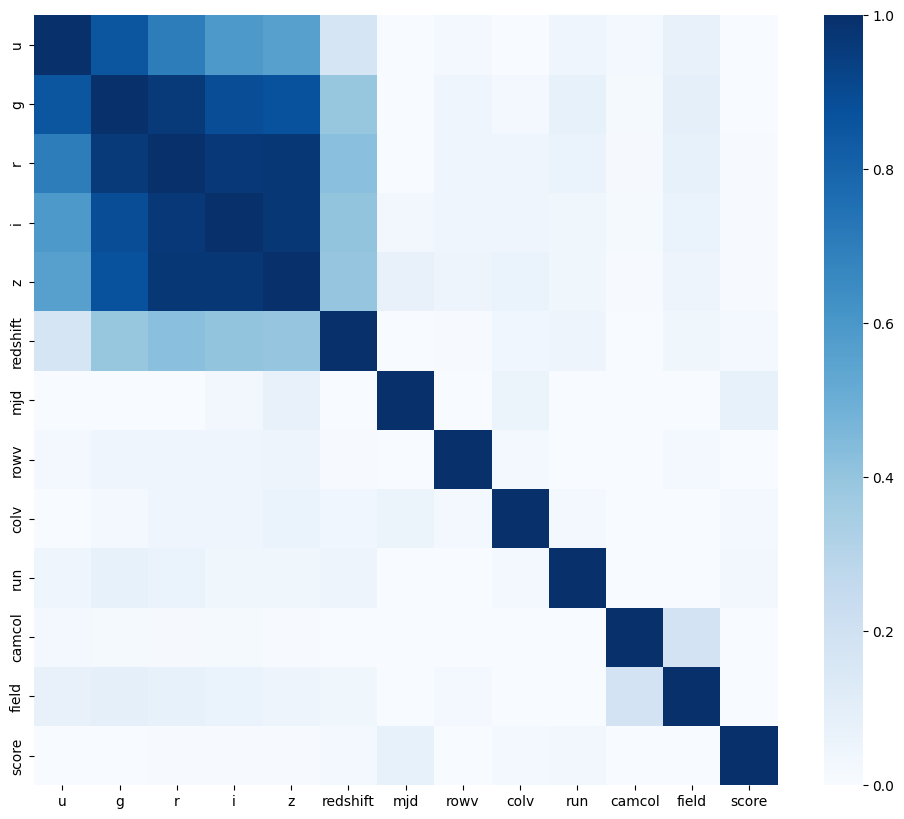

In [12]:
#Correlación de intensidad de luz capturada en los diferentes filtros de color
features = ["u","g","r","i","z","redshift","mjd","rowv","colv", "run","camcol","field","score"]
plt.figure(figsize=(12, 10))
sns.heatmap(data[features].corr(), cmap="Blues", vmin=0, vmax=1)

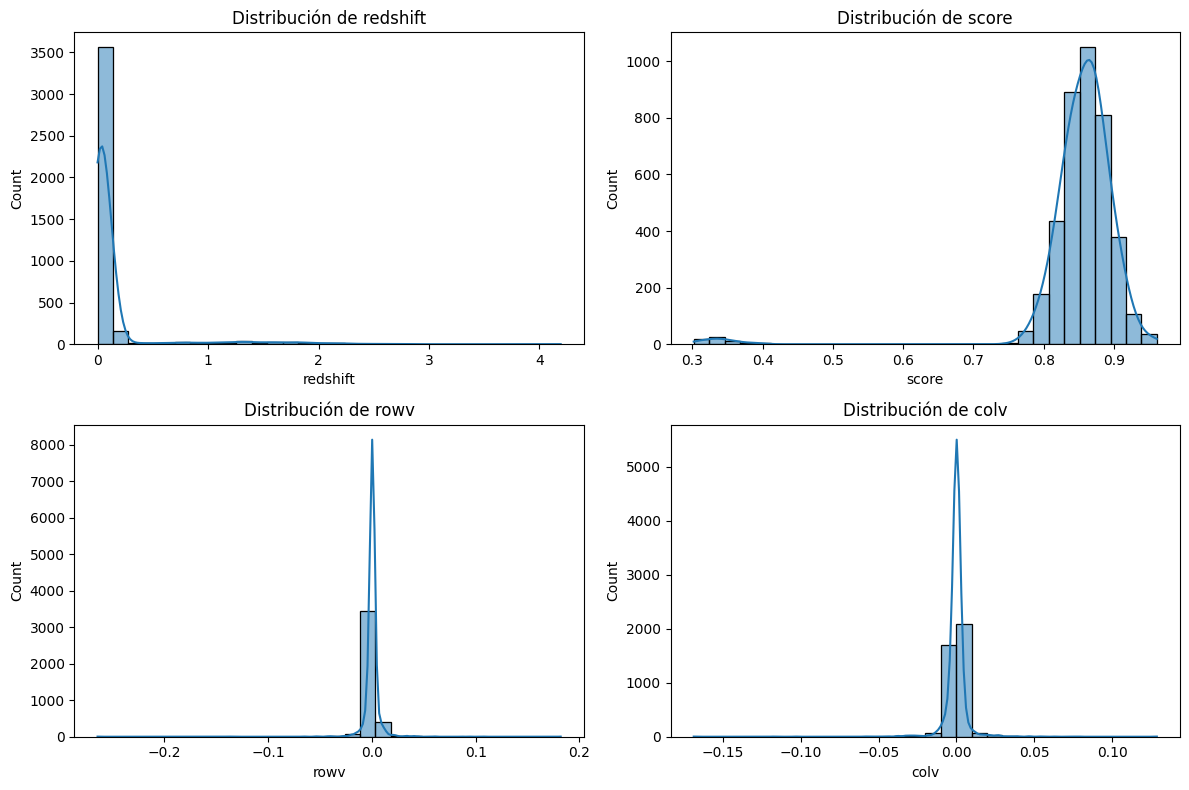

In [13]:
# Visualización de distribución de variables importantes
plt.figure(figsize=(12, 8))
for i, col in enumerate(["redshift", "score", "rowv", "colv"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


In [14]:
#ver variables relevantes cuando no es confiable 
data_filtrado = data[data["clean"] == 0]
a= data_filtrado[["redshift","score","ra","dec"]]
a.describe()

,redshift,score,ra,dec
count,418.000000,418.000000,418.000000,418.000000
mean,0.098596,0.848432,190.237457,0.313143
std,0.241239,0.081830,41.983630,1.993102
min,-0.000481,0.317932,10.564540,-1.224238
25%,0.026117,0.835864,167.757976,-0.561369
50%,0.063476,0.861565,199.207520,0.146696
75%,0.094120,0.877689,218.123015,0.601002
max,2.367378,0.961145,248.690266,13.840892


In [15]:
#ver variables relevantes cuando es confiable 
data_filtrado = data[data["clean"] == 1]
a= data_filtrado[["redshift","score","ra","dec"]]
a.describe()

,redshift,score,ra,dec
count,3582.000000,3582.000000,3582.000000,3582.000000
mean,0.138149,0.852154,184.973177,0.241469
std,0.392551,0.069983,41.626098,2.002146
min,-0.003322,0.301912,10.469743,-1.252763
25%,0.000085,0.837014,162.292694,-0.644473
50%,0.021392,0.860675,195.250424,0.042589
75%,0.086135,0.879834,213.322911,0.593205
max,4.192597,0.961145,249.758313,13.854010


## Limpieza de Datos

2.1 Elimincación de errores de formato

In [19]:
# Eliminación de registros con ausencias. 
data=data.dropna()

In [20]:
# Eliminación de registros duplicados.
data=data.drop_duplicates()

In [21]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data.shape

(3983, 18)

In [22]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,3.983000e+03,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,1.237649e+18,185.492078,0.249842,18.609083,17.363316,16.839563,16.597420,16.439140,744.054733,3.375596,419.132312,0.851756,0.895305,0.134292,52959.847351,0.000217,-0.000093
std,4.222160e+11,41.675011,2.004738,0.839262,0.950536,1.055080,1.141109,1.190451,98.351819,1.698384,167.011142,0.071434,0.306198,0.380487,1602.582094,0.008811,0.007468
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.000000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.463210,-0.631846,18.170070,16.793890,16.190330,15.870765,15.628000,752.000000,2.000000,311.000000,0.836865,1.000000,0.000106,51821.000000,-0.001212,-0.001610
50%,1.237649e+18,195.804913,0.052999,18.843730,17.472600,16.850600,16.571020,16.401760,756.000000,3.000000,433.000000,0.860675,1.000000,0.031775,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.315696,0.593016,19.261455,17.995970,17.508155,17.259460,17.147645,756.000000,5.000000,527.000000,0.879834,1.000000,0.086468,54468.000000,0.001697,0.001673
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.000000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


2.2 Eliminación de errores logicos 

In [23]:
# Eliminación de redshift negativo 
data.drop(data[data["redshift"] < 0].index, inplace =True)


In [24]:
#Eliminación mediciones no confiables
data.drop(data[data["clean"] == 0].index, inplace =True)

In [25]:
# Podemos ver el tamaño del conjunto de datos después de este paso de limpieza de datos.
data.shape

(2950, 18)

In [26]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,2.950000e+03,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.0,2950.000000,2950.000000,2950.000000,2950.000000
mean,1.237649e+18,183.682748,0.191911,18.659604,17.405990,16.863261,16.600726,16.434732,741.915932,3.342712,411.323729,0.854912,1.0,0.167385,52867.229153,0.000203,-0.000040
std,4.336461e+11,40.330982,1.858646,0.804319,0.931180,1.045488,1.112108,1.184986,101.015386,1.698794,166.108851,0.058140,0.0,0.426854,1556.902264,0.006935,0.004933
min,1.237646e+18,10.469743,-1.252763,14.271480,12.974870,12.362850,12.010790,11.799530,211.000000,1.000000,19.000000,0.301912,1.0,0.000000,51608.000000,-0.264516,-0.103396
25%,1.237649e+18,161.628596,-0.648158,18.264512,16.874327,16.209782,15.873965,15.613565,752.000000,2.000000,307.000000,0.837283,1.0,0.000271,51821.000000,-0.001202,-0.001605
50%,1.237649e+18,192.786291,0.013618,18.889870,17.501230,16.858325,16.561920,16.393540,756.000000,3.000000,419.500000,0.860631,1.0,0.052522,51984.000000,0.000308,0.000146
75%,1.237649e+18,211.186747,0.585553,19.276780,18.013785,17.522635,17.266295,17.151240,756.000000,5.000000,519.000000,0.879875,1.0,0.095670,54208.000000,0.001687,0.001645
max,1.237650e+18,249.723574,13.812148,19.599750,20.204270,20.118660,20.598250,20.747790,1035.000000,6.000000,812.000000,0.961145,1.0,4.192597,58932.000000,0.086376,0.046058
